## mnist 손글씨 자료
- 딥러닝으로 분석
- 입력 784개 -> 출력 0 ~9 10개 : 분류

In [46]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.datasets.mnist import load_data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [4]:
(train_x, train_y), (test_x, test_y) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
# 검증용 데이터셋 준비
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, stratify=train_y)

In [9]:
print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)

(45000, 28, 28) (45000,) (15000, 28, 28) (15000,)


### 데이터 전처리
-----
- 수치 데이터 -> 스케일링
- 범주 데이터 -> 원핫인코딩

In [14]:
# 저장된 값 확인
train_x[0], train_y[0]

# 픽셀값 0~1으로 스케일링
train_x = train_x /255.0
val_x = val_x /255.0
test_x = test_x /255.0

In [17]:
# 타겟 라벨 -> OneHotEncoding으로 변환
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(train_y.reshape(-1,1))

train_y = ohe.transform(train_y.reshape(-1,1))
test_y = ohe.transform(test_y.reshape(-1,1))
val_y = ohe.transform(val_y.reshape(-1,1))

train_y = train_y.toarray()
test_y = test_y.toarray()
val_y = val_y.toarray()

### 모델 생성
- 입력 데이터 : 784
- 출력 데이터 : 10

In [24]:
md = Sequential(name='mnist')
md.add(Dense(30, activation='relu', input_shape=(784,)))
md.add(Dense(30, activation='relu'))
md.add(Dense(10, activation='softmax'))
md.summary()

Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


### 모델 생성

In [33]:
md.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
res = md.fit(train_x.reshape(-1,28*28), train_y, epochs=5, validation_data=(val_x.reshape(-1,28*28), val_y))

Epoch 1/5
1407/1407 [==============================] - 7s 4ms/step - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.1348 - val_accuracy: 0.9624
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.1348 - val_accuracy: 0.9637
Epoch 3/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.1440 - val_accuracy: 0.9631
Epoch 4/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0429 - accuracy: 0.9863 - val_loss: 0.1409 - val_accuracy: 0.9639
Epoch 5/5
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0394 - accuracy: 0.9870 - val_loss: 0.1483 - val_accuracy: 0.9653


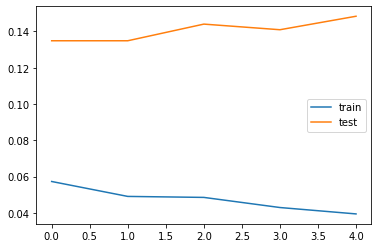

In [42]:
# 학습 결과
plt.plot(res.epoch, res.history['loss'] )
plt.plot(res.epoch, res.history['val_loss'] )
plt.legend(['train', 'test'])
plt.show()

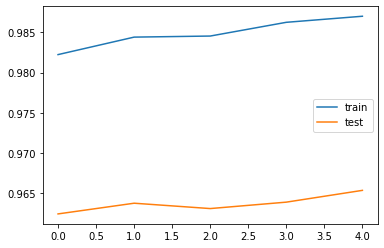

In [41]:
# 학습 결과2
plt.plot(res.epoch, res.history['accuracy'] )
plt.plot(res.epoch, res.history['val_accuracy'] )
plt.legend(['train', 'test'])
plt.show()

In [49]:
from keras.callbacks import ModelCheckpoint
stopdb = EarlyStopping(monitor='val_loss', patience=3)
MODEL_PATH = './modelFiles'
modeldb = ModelCheckpoint(filepath=MODEL_PATH, save_best_only=True)

In [50]:
md = Sequential(name='mnist')
md.add(Dense(30, activation='relu', input_shape=(784,)))
md.add(Dropout(0.3))
md.add(Dense(30, activation='relu'))
md.add(Dense(10, activation='softmax'))
md.summary()
md.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
res = md.fit(train_x.reshape(-1,28*28), train_y, epochs=10, validation_data=(val_x.reshape(-1,28*28), val_y), callbacks=[stopdb, modeldb])

Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                23550     
                                                                 
 dropout_4 (Dropout)         (None, 30)                0         
                                                                 
 dense_16 (Dense)            (None, 30)                930       
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.6381 - accuracy: 0.8007 - val_loss: 0.2645 - val_accuracy: 0.9205
Epoch 2/10
1407/1407 [=======================

### 평가

In [52]:
test_result = md.evaluate(test_x.reshape(-1,28*28), test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.1421 - accuracy: 0.9580


In [61]:
pre_label = md.predict(test_x[0].reshape(-1,28*28))
np.round(pre_label,2)

1/1 [==============================] - 0s 40ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)